In [1]:
import glob
import cv2
import os
import numpy as np
from natsort import natsorted

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
paths = glob.glob("train/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))

Total labels: 12
Labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


### Take a look at some samples from each class

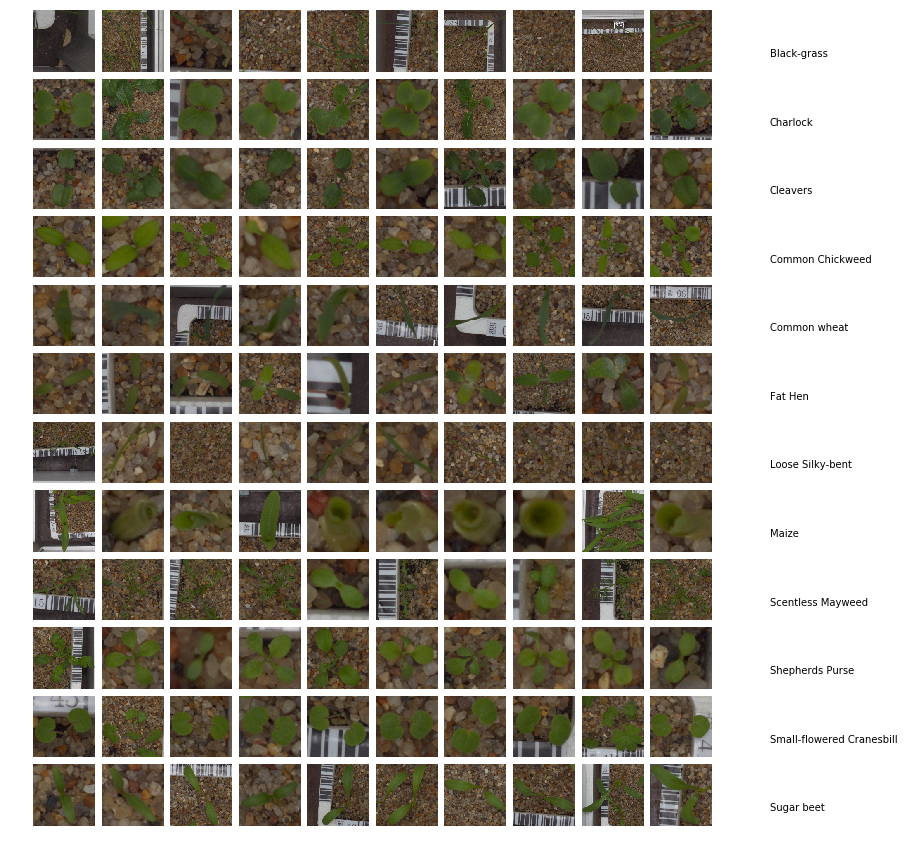

In [3]:
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)
    
    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()        

In [4]:
total = 0
for name, value in n_img_class:
    print("{}\t{}".format(value, name))
    total += value
    
print("\nTotal samples: {}".format(total))

263	Black-grass
390	Charlock
287	Cleavers
611	Common Chickweed
221	Common wheat
475	Fat Hen
654	Loose Silky-bent
221	Maize
516	Scentless Mayweed
231	Shepherds Purse
496	Small-flowered Cranesbill
385	Sugar beet

Total samples: 4750


### Split dataset into training, validation and testing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import pickle

In [6]:
images_path = natsorted(glob.glob("train/*/*"))
labels = [x.split("\\")[-2] for x in images_path]

print(images_path[:10])
print(labels[:10])

lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels[:10])
print(lb.classes_)

pickle.dump(lb, open("label.pkl", "wb"))

['train\\Black-grass\\0ace21089.png', 'train\\Black-grass\\0b3e7a7a9.png', 'train\\Black-grass\\0b228a6b8.png', 'train\\Black-grass\\0bb75ded8.png', 'train\\Black-grass\\0be707615.png', 'train\\Black-grass\\0c67c3fc3.png', 'train\\Black-grass\\0d1a9985f.png', 'train\\Black-grass\\0d4f74f4a.png', 'train\\Black-grass\\0d28c429b.png', 'train\\Black-grass\\0dad57e7f.png']
['Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass']
[0 0 0 0 0 0 0 0 0 0]
['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [7]:
Xtr, Xte, ytr, yte = train_test_split(images_path, labels, test_size=250)
Xtr, Xval, ytr, yval = train_test_split(Xtr, ytr, test_size=250)

Look at how the classes are spread across the splits, since the dataset suffers from class imbalance

In [8]:
counts = []
for i in [ytr, yval, yte]:
    unique, count = np.unique(i, return_counts=True)
    counts.append(count)
    
df = pd.DataFrame({"labels": unique, "train": counts[0], "val": counts[1], "test": counts[2]})
print(df)

    labels  train  val  test
0        0    236   13    14
1        1    340   25    25
2        2    255   17    15
3        3    552   36    23
4        4    199    8    14
5        5    419   26    30
6        6    585   39    30
7        7    207    7     7
8        8    459   27    30
9        9    213    9     9
10      10    439   26    31
11      11    346   17    22


Some imbalance, hmmm..... Let's pickle it and see how it goes!

In [9]:
pickle.dump([(Xtr, ytr), (Xval, yval), (Xte, yte)], open("data_split.pkl", "wb"))